In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

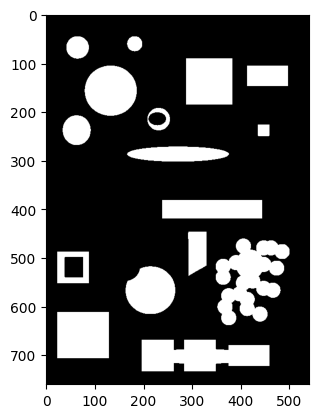

In [11]:
img = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic24/images/detect_blob.png")
img_gray = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic24/images/detect_blob.png", 0)
img_bin = cv.threshold(img_gray, 0, 255,
	cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
plt.imshow(img_bin, "gray")
plt.show()

In [12]:
(numLabels, labels, stats, centroids) = cv.connectedComponentsWithStats(img_bin)

In [7]:
numLabels

18

******************************
Visitando el elemento 1/18
Coordenada x=0, coordenada y=0
ancho=541, alto=760, área(px)=2059
Coordenadas del centroide 270.0, 280.1554152501214

******************************
Visitando el elemento 2/18
Coordenada x=42, coordenada y=46
ancho=46, alto=46, área(px)=1683
Coordenadas del centroide 64.29411764705883, 68.1883541295306

******************************
Visitando el elemento 3/18
Coordenada x=166, coordenada y=46
ancho=31, alto=31, área(px)=758
Coordenadas del centroide 181.30079155672823, 60.62137203166227

******************************
Visitando el elemento 4/18
Coordenada x=287, coordenada y=91
ancho=95, alto=95, área(px)=9025
Coordenadas del centroide 334.0, 138.0

******************************
Visitando el elemento 5/18
Coordenada x=79, coordenada y=106
ancho=107, alto=103, área(px)=8695
Coordenadas del centroide 132.23070730304772, 156.93525014376078

******************************
Visitando el elemento 6/18
Coordenada x=412, coordenada y=1

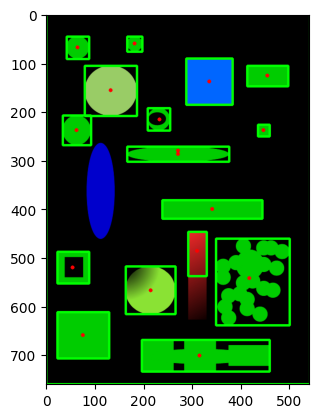

In [18]:
copia = img.copy()

for i in range(1, numLabels):
    # extract the connected component statistics and centroid for
    # the current label
    x = stats[i, cv.CC_STAT_LEFT]
    y = stats[i, cv.CC_STAT_TOP]
    w = stats[i, cv.CC_STAT_WIDTH]
    h = stats[i, cv.CC_STAT_HEIGHT]
    area = stats[i, cv.CC_STAT_AREA]
    (cX, cY) = centroids[i]	
    cv.rectangle(copia, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv.circle(copia, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    print(f"""{"".center(30, "*")}
Visitando el elemento {i}/{numLabels}
Coordenada x={x}, coordenada y={y}
ancho={w}, alto={h}, área(px)={area}
Coordenadas del centroide {cX}, {cY}\n""")

plt.imshow(copia[:, :, ::-1])
plt.show()